In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
worldHappines = pd.read_csv('WorldHappinessReportGen.csv', index_col=0)
worldHappines = worldHappines[worldHappines['Year']==2015]
worldHappines.drop('Year',axis=1,inplace=True)
print(worldHappines.shape)
worldHappines.head()

(158, 9)


,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Afghanistan,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
5,Albania,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894
10,Algeria,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209
15,Angola,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939
19,Argentina,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600


In [ ]:
lifeExpectancy = pd.read_csv('lifeExpectancyGen.csv')
lifeExpectancy.rename(columns = {"country":"Country", "year":"Year"}, inplace=True)
print(lifeExpectancy.shape)
lifeExpectancy.head()

(183, 18)


,Country,life expectancy,adult mortality,alcohol,percentage expenditure,hepatitis b,measles,bmi,under-five deaths,polio,total expenditure,diphtheria,hiv/aids,gdp,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling
0,Afghanistan,65.0,263.0,0.010,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,Albania,77.8,74.0,4.600,364.975229,99.0,0,58.0,0,99.0,6.00,99.0,0.1,3954.227830,1.2,1.3,0.762,14.2
2,Algeria,75.6,19.0,5.285,0.000000,95.0,63,59.5,24,95.0,7.08,95.0,0.1,4132.762920,6.0,5.8,0.743,14.4
3,Angola,52.4,335.0,5.285,0.000000,64.0,118,23.3,98,7.0,7.08,64.0,1.9,3695.793748,8.3,8.2,0.531,11.4
4,Antigua and Barbuda,76.4,13.0,5.285,0.000000,99.0,0,47.7,0,86.0,7.08,99.0,0.2,13566.954100,3.3,3.3,0.784,13.9


In [ ]:
countryData = pd.read_csv('250CountryDataGen.csv', index_col=0)
countryData.rename(columns = {"name":"Country"}, inplace=True)
print(countryData.shape)
countryData.head()

(247, 16)


,Country,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Population Density,Literate Count,Illiterate Count,Unemployment Count,Employment Count,Literate Working Rate
0,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.800000,3.100000,28.100000,6.800000,35.000000,42.403976,7.771658e+06,1.988549e+07,9.680001e+06,1.797714e+07,2.313167
1,Åland Islands,Europe,Northern Europe,28875,1580.0,31.816216,0.434211,98.172973,1.897297,10.202703,18.275316,2.834745e+04,5.275541e+02,2.946030e+03,2.592897e+04,0.914685
2,Albania,Europe,Southern Europe,2886026,28748.0,34.500000,0.700000,98.700000,1.700000,16.900000,100.390497,2.848508e+06,3.751834e+04,4.877384e+05,2.398288e+06,0.841945
3,Algeria,Africa,Northern Africa,40400000,2381741.0,35.300000,3.100000,79.000000,3.900000,10.300000,16.962382,3.191600e+07,8.484000e+06,4.161200e+06,3.623880e+07,1.135443
4,American Samoa,Oceania,Polynesia,57100,199.0,40.100000,3.000000,97.000000,2.613333,17.885833,286.934673,5.538700e+04,1.713000e+03,1.021281e+04,4.688719e+04,0.846538


In [ ]:
before = ['Somaliland region', 'Bolivia (Plurinational State of)','Congo (Brazzaville)','Congo (Kinshasa)','Iran (Islamic Republic of)', "Lao People's Democratic Republic", "Democratic People's Republic of Korea", 'Republic of Moldova', 'Russian Federation', 'Somaliland Region', 'Syrian Arab Republic', 'United Kingdom of Great Britain and Northern Ireland', 'United States of America', 'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Czechia']
after = ['Somaliland Region', 'Bolivia', 'Congo', 'Democratic Republic of the Congo', 'Iran', "Laos", "Republic of Korea", 'Moldova', 'Russia', 'Somalia', 'Syria', 'United Kingdom', 'United States', 'Venezuela', 'Vietnam', 'Czech Republic']
worldHappines['Country'].replace(before, after,inplace=True)
lifeExpectancy['Country'].replace(before, after,inplace=True)

In [ ]:
worldAndLife = worldHappines.merge(lifeExpectancy, on=['Country'])
worldAndLife.head()

In [ ]:
before = ['Bolivia', 'Congo (Democratic Republic of the)', 'Iran (Islamic Republic of)', "Korea (Democratic People's Republic of)", 'Moldova (Republic of)', 'Russian Federation', 'Syrian Arab Republic', 'United Kingdom of Great Britain and Northern Ireland', 'United States of America', 'Venezuela (Bolivarian Republic of)', 'Viet Nam']
after = ['Bolivia (Plurinational State of)', 'Democratic Republic of the Congo', 'Iran', 'Korea (Republic of)', 'Moldova', 'Russia', 'Syria', 'United Kingdom', 'United States', 'Venezuela', 'Vietnam']
worldAndLife['Country'].replace(before, after,inplace=True)
countryData['Country'].replace(before, after,inplace=True)

In [ ]:
allDataMerged = worldAndLife.merge(countryData, on='Country')
print(allDataMerged.shape)
allDataMerged.head()

(148, 41)


,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,life expectancy,adult mortality,alcohol,percentage expenditure,hepatitis b,measles,bmi,under-five deaths,polio,total expenditure,diphtheria,hiv/aids,gdp,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%),Population Density,Literate Count,Illiterate Count,Unemployment Count,Employment Count,Literate Working Rate
0,Afghanistan,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,65.0,263.0,0.010,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1,Asia,Southern Asia,27657145,652230.0,27.8,3.1,28.1,6.8,35.000000,42.403976,7.771658e+06,1.988549e+07,9680000.750,1.797714e+07,2.313167
1,Albania,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,77.8,74.0,4.600,364.975229,99.0,0,58.0,0,99.0,6.00,99.0,0.1,3954.227830,1.2,1.3,0.762,14.2,Europe,Southern Europe,2886026,28748.0,34.5,0.7,98.7,1.7,16.900000,100.390497,2.848508e+06,3.751834e+04,487738.394,2.398288e+06,0.841945
2,Algeria,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,75.6,19.0,5.285,0.000000,95.0,63,59.5,24,95.0,7.08,95.0,0.1,4132.762920,6.0,5.8,0.743,14.4,Africa,Northern Africa,40400000,2381741.0,35.3,3.1,79.0,3.9,10.300000,16.962382,3.191600e+07,8.484000e+06,4161200.000,3.623880e+07,1.135443
3,Angola,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939,52.4,335.0,5.285,0.000000,64.0,118,23.3,98,7.0,7.08,64.0,1.9,3695.793748,8.3,8.2,0.531,11.4,Africa,Middle Africa,25868000,1246700.0,58.6,5.6,70.4,8.9,28.062069,20.749178,1.821107e+07,7.656928e+06,7259096.000,1.860890e+07,1.021846
4,Argentina,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600,76.3,116.0,5.285,0.000000,94.0,0,62.8,9,93.0,7.08,94.0,0.1,13467.123600,1.0,0.9,0.826,17.3,Americas,South America,43590400,2780400.0,44.5,3.5,97.9,20.8,7.500000,15.677744,4.267500e+07,9.153984e+05,3269280.000,4.032112e+07,0.944842


In [ ]:
allDataMerged.to_csv('allDataMergedGen.csv')

In [ ]:
print(matrix.columns)

Index(['Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'life expectancy', 'adult mortality',
       'alcohol', 'percentage expenditure', 'hepatitis b', 'measles', 'bmi',
       'under-five deaths', 'polio', 'total expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'thinness 1-19 years', 'thinness 5-9 years',
       'income composition of resources', 'schooling', 'population', 'area',
       'gini', 'Real Growth Rating(%)', 'Literacy Rate(%)', 'Inflation(%)',
       'Unemployement(%)', 'Population Density', 'Literate Count',
       'Illiterate Count', 'Unemployment Count', 'Employment Count',
       'Literate Working Rate'],
      dtype='object')


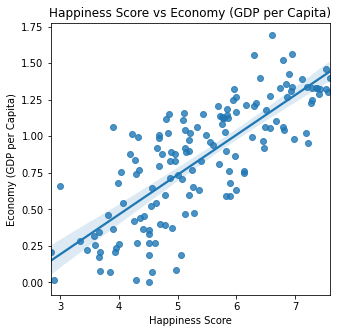

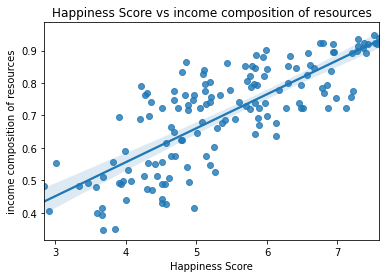

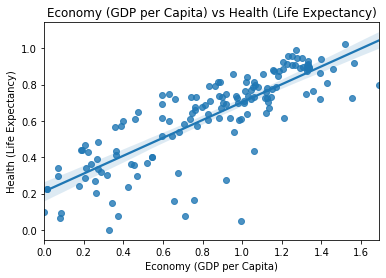

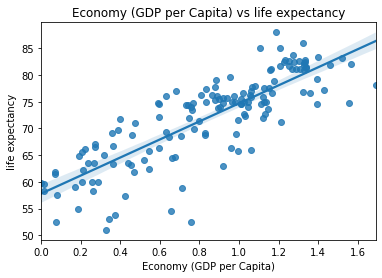

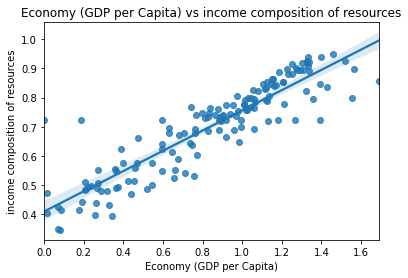

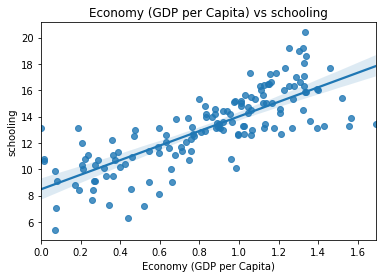

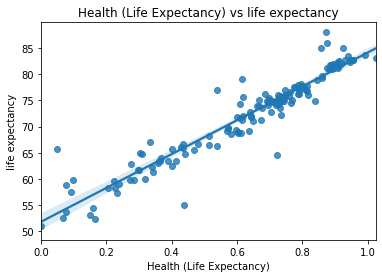

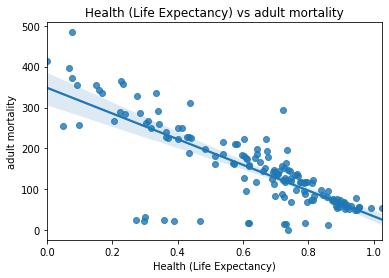

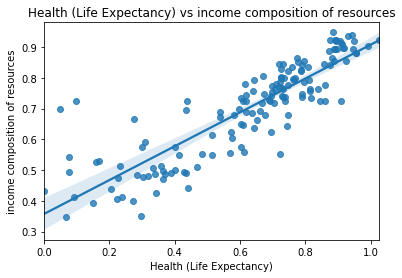

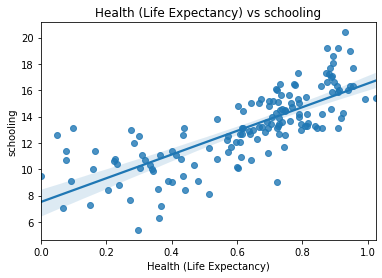

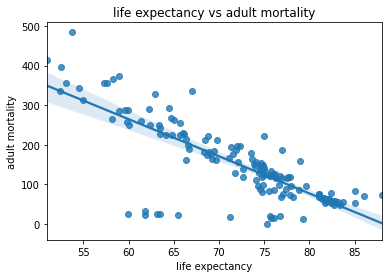

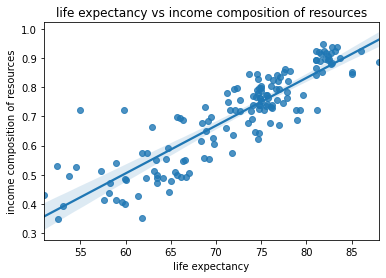

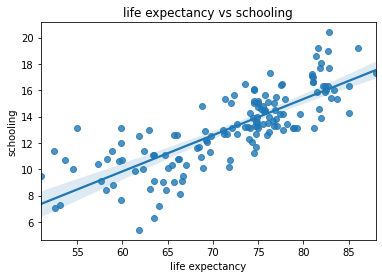

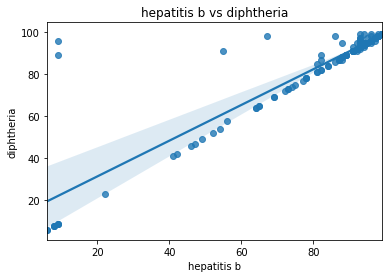

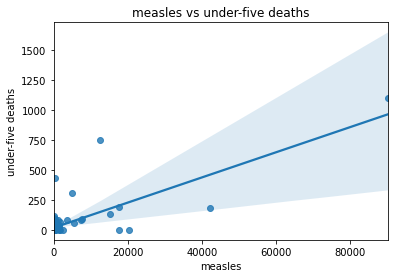

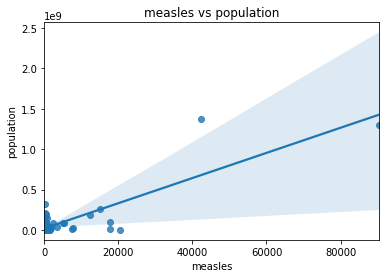

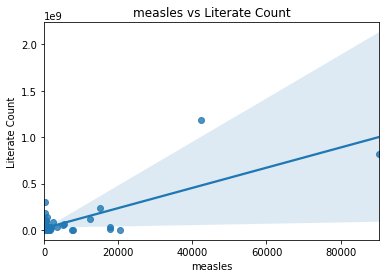

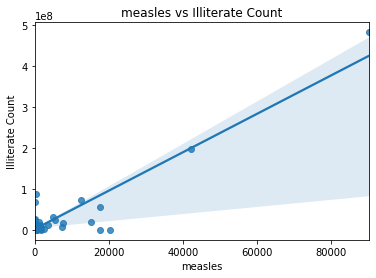

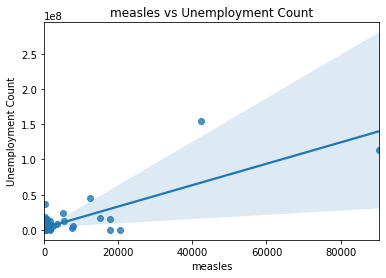

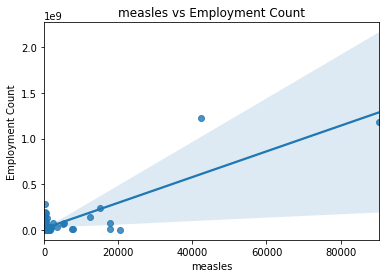

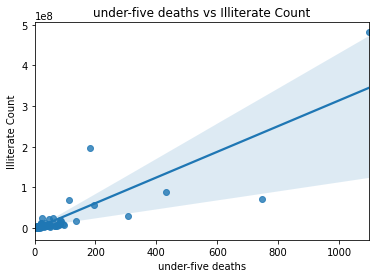

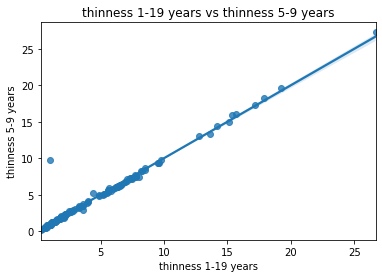

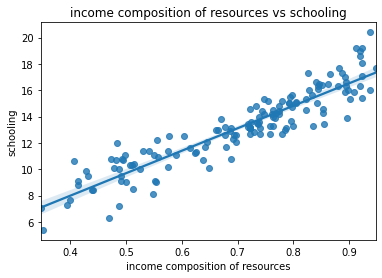

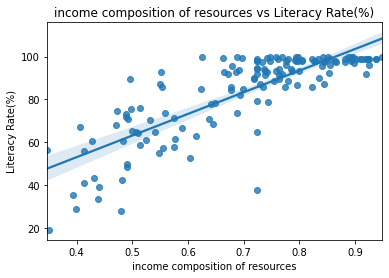

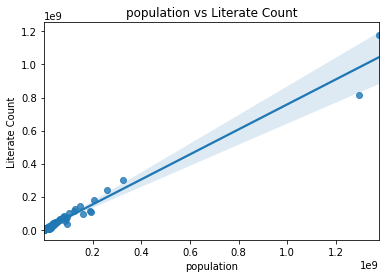

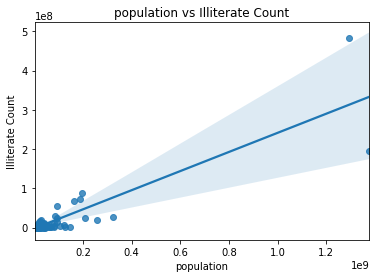

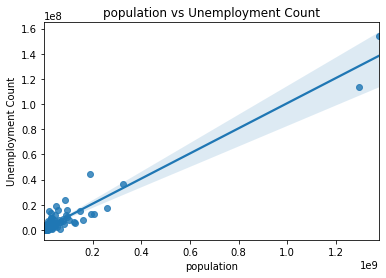

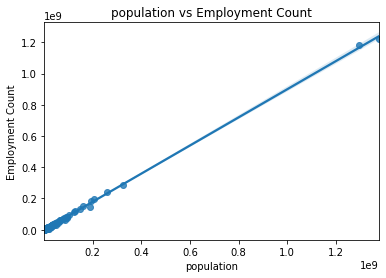

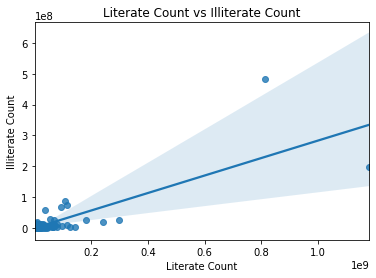

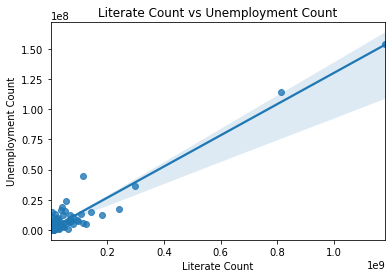

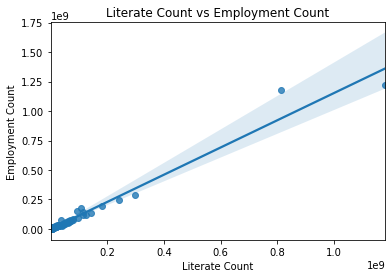

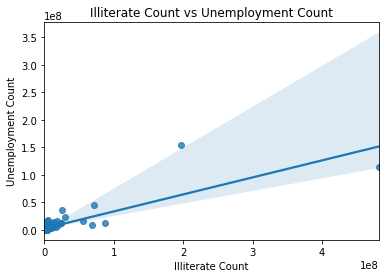

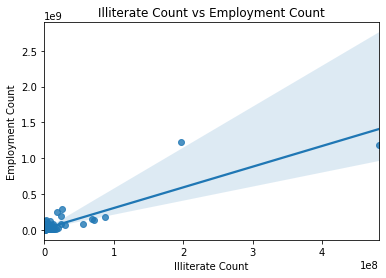

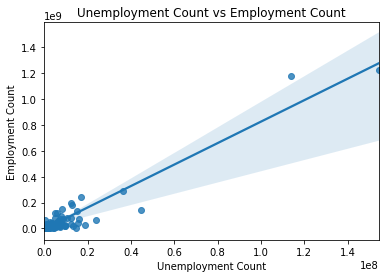

In [ ]:
plt.figure(figsize=(5,5))
matrix = allDataMerged.corr()
thresh = .75
plotted = []
for col1 in matrix.columns:
  for col2 in matrix.columns:
    if col1!=col2 and (matrix[col1][col2]>=thresh or matrix[col1][col2]<=-thresh):
      if ((col1+" vs "+col2) in plotted) or ((col2+" vs "+col1) in plotted):
        continue
      plotted.append(col1+" vs "+col2)
      plt.title(col1+" vs "+col2)
      sns.regplot(x=allDataMerged[col1], y=allDataMerged[col2])
      plt.show()
# sns.heatmap(matrix[(matrix>.75) | (matrix<-.75)], annot=True)

Happiness Score vs income composition of resources

Health (Life Expectancy) vs schooling